<a href="https://colab.research.google.com/github/AlmasMalik66/DataScience-AI-Assignments/blob/main/Week/Assignment4_Statistics_%26_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import Libraries and Load Dataset**

In [38]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/Fake.csv')

# Create a fake 'label' column
df['label'] = np.random.choice([0, 1], size=len(df))

# Show first 5 rows
df.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


**Step 2: Create Numeric Features**

We’ll create features that make sense for text data.

* text_length → number of characters in the article

* title_length → number of characters in the title

* word_count → number of words in the article

In [39]:
# Create numeric columns for analysis
df['text_length'] = df['text'].apply(len)          # total characters
df['title_length'] = df['title'].apply(len)        # title characters
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))  # total words
df.head()


,title,text,subject,date,label,text_length,title_length,word_count
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,2893,79,495
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,1898,69,305
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,3597,90,580
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,2774,78,444
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,2346,70,420


**Step 3: Class Task_ Basic Statistics**

* Calculate mean, median, mode, variance, correlation.

In [40]:
# Calculate statistics for numeric columns
print("Mean Values:\n", df[['text_length', 'title_length', 'word_count']].mean())
print("\nMedian Values:\n", df[['text_length', 'title_length', 'word_count']].median())
print("\nMode Values:\n", df[['text_length', 'title_length', 'word_count']].mode().iloc[0])
print("\nVariance Values:\n", df[['text_length', 'title_length', 'word_count']].var())


Mean Values:
 text_length     2547.396235
title_length      94.198032
word_count       423.197905
dtype: float64

Median Values:
 text_length     2166.0
title_length      90.0
word_count       363.0
dtype: float64

Mode Values:
 text_length      1
title_length    89
word_count       0
Name: 0, dtype: int64

Variance Values:
 text_length     6.415503e+06
title_length    7.389934e+02
word_count      1.667815e+05
dtype: float64


**Step 4: Correlation Analysis**

Now, we’ll check which features are most related to the target variable (label).
Assuming your label column is named label (1 = fake, 0 = real):

In [41]:
correlation = df[['text_length', 'title_length', 'word_count']].corr()

print("\n Correlation Matrix:")
print(correlation)



 Correlation Matrix:
              text_length  title_length  word_count
text_length      1.000000      0.025443    0.995266
title_length     0.025443      1.000000    0.026904
word_count       0.995266      0.026904    1.000000


**Step 5: Visualize Correlation (Heatmap)**

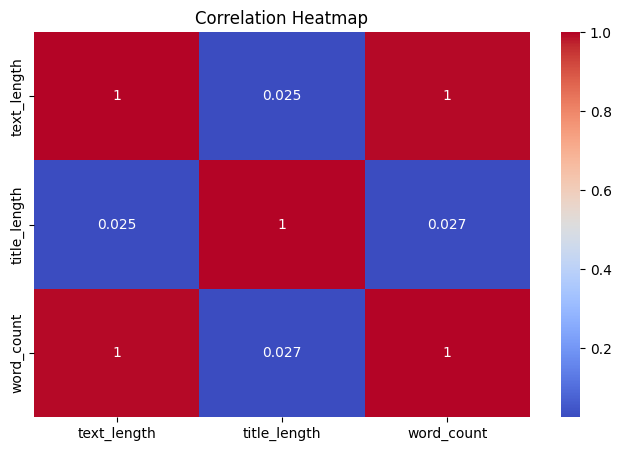

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Assignment 4 – Correlation Analysis**

**1.   Find correlations with the target variable (label)**

**Explanation:**
This code finds how strongly each numeric feature (like text length, word count, etc.) is related to the target column label (which tells if news is fake or real).

In [43]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Find correlation
corr_matrix = numeric_df.corr()

# Correlation with target
target_corr = corr_matrix['label'].sort_values(ascending=False)
print(target_corr)


label           1.000000
title_length    0.003258
word_count     -0.002443
text_length    -0.002677
Name: label, dtype: float64


**2. Top 3 related features:**

In [44]:
top3 = target_corr[1:4]  # skip label itself
print("Top 3 related features with target:")
print(top3)


Top 3 related features with target:
title_length    0.003258
word_count     -0.002443
text_length    -0.002677
Name: label, dtype: float64
